In [1]:
import json

In [2]:
with open('image_reward.json', 'r') as f:
    data = json.load(f)

In [79]:
from datasets import load_dataset
dataset = load_dataset("weathon/aas_benchmark", split="train")


In [33]:
dataset = dataset.remove_columns(["image_original", "image_distorted"])

In [39]:
distorted_llm_effects = [i["llm_distorted_special_effects"] for i in dataset["llm_judge"]]

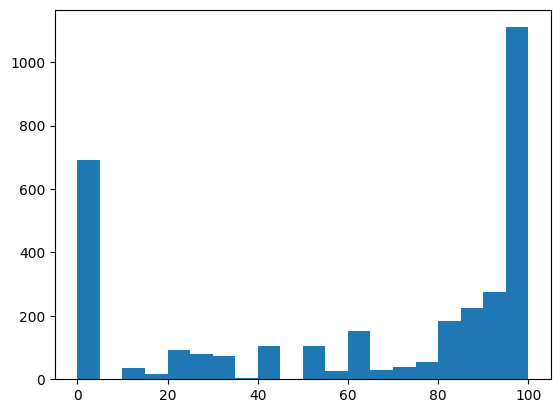

In [42]:
import pylab
pylab.hist(distorted_llm_effects, bins=20)
pylab.show()

In [38]:
dataset["llm_judge"][0].keys()

dict_keys(['llm_distorted_main_concepts', 'llm_distorted_reasoning', 'llm_distorted_special_effects', 'llm_original_main_concepts', 'llm_original_reasoning', 'llm_original_special_effects'])

In [48]:
import pylab
delta_original_prompt = [i["image_reward_diop"] - i["image_reward_oiop"] for i in data]
delta_distortion_prompt = [i["image_reward_didp"] - i["image_reward_oidp"] for i in data]

In [ ]:
import numpy as np
image_reward_diop = np.array([i["image_reward_diop"] for i in data])
image_reward_oiop = np.array([i["image_reward_oiop"] for i in data])
image_reward_didp = np.array([i["image_reward_didp"] for i in data])
image_reward_oidp = np.array([i["image_reward_oidp"] for i in data])

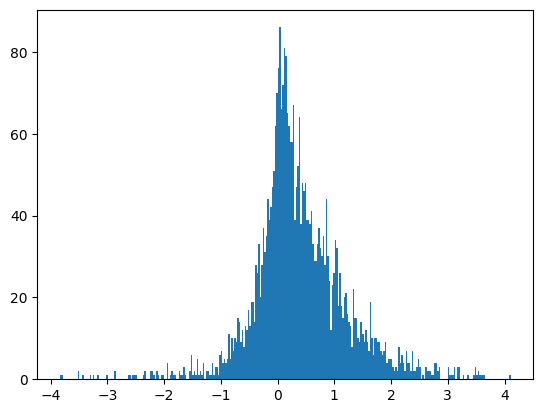

In [23]:
pylab.hist(data_distortion_prompt, bins=300)
pylab.show()

In [19]:
# one sample t test  
from scipy import stats
t_statistic, p_value = stats.ttest_1samp(data_distortion_prompt, 0, alternative='greater')
print(f"T-statistic: {t_statistic}, P-value: {p_value}")

import numpy as np

mean_diff = np.mean(data_distortion_prompt) - 0
std_dev = np.std(data_distortion_prompt, ddof=1)
cohen_d = mean_diff / std_dev
print(f"Cohen's d: {cohen_d}")


T-statistic: 27.211780081696713, P-value: 1.403182799069316e-147
Cohen's d: 0.4736962891003711


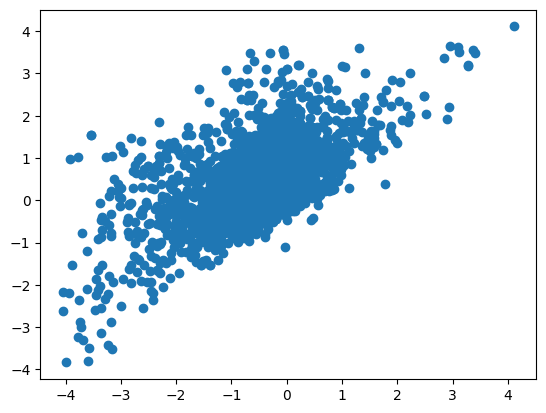

In [ ]:
pylab.scatter(delta_original_prompt, data_distortion_prompt)

In [30]:
# regression p value
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(delta_original_prompt, data_distortion_prompt, alternative="greater")
print(f"r_value: {r_value}, P-value: {p_value}") 

r_value: 0.5379358109688968, P-value: 2.9235963886202193e-247


In [25]:
# regression
import statsmodels.api as sm
X = sm.add_constant(delta_original_prompt)
model = sm.OLS(data_distortion_prompt, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     1343.
Date:                Fri, 17 Oct 2025   Prob (F-statistic):          5.85e-247
Time:                        01:40:58   Log-Likelihood:                -3493.3
No. Observations:                3300   AIC:                             6991.
Df Residuals:                    3298   BIC:                             7003.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5943      0.013     44.549      0.0

In [47]:
distorted_llm_effects = np.array(distorted_llm_effects)

In [109]:
success_group = distorted_llm_effects > 50
failed_group = np.where(distorted_llm_effects <= 50)[0]
success_delta_distortion = np.array(delta_distortion_prompt)[success_group]
failure_delta_distortion = np.array(delta_distortion_prompt)[~success_group]

In [76]:
success_group_index = np.where(success_group)[0]

In [84]:
dataset

Dataset({
    features: ['image_original', 'image_distorted', 'index', 'prompt_original', 'prompt_distorted', 'selected_dims', 'hpsv2', 'llm_judge', 'model'],
    num_rows: 3300
})

The distorted prompt describes several specific effects:
1. Luggage sits abandoned in a dim, distorted baggage claim — The image shows luggage in a baggage claim area, and the scene has a dim, somewhat distorted quality, so this is present.
2. Colors clashing harshly under flickering lights — The lighting is warm and uneven, with a yellowish glow, but the colors are not clashing harshly; they are more harmonious than described. The lights are not flickering, but rather steady. This effect is partially present but not fully accurate.
3. Evoking loneliness and unease — The scene does evoke a sense of solitude, but the overall mood is more calm and nostalgic than uneasy. This is somewhat present.
4. Warped shapes — The shapes of the luggage and the floor are slightly stylized and warped, especially the floor tiles, which are irregular and distorted. This is present.
5. Ugly, low-quality background — The background is detailed and not particularly low-quality; it is stylized but not ugly o

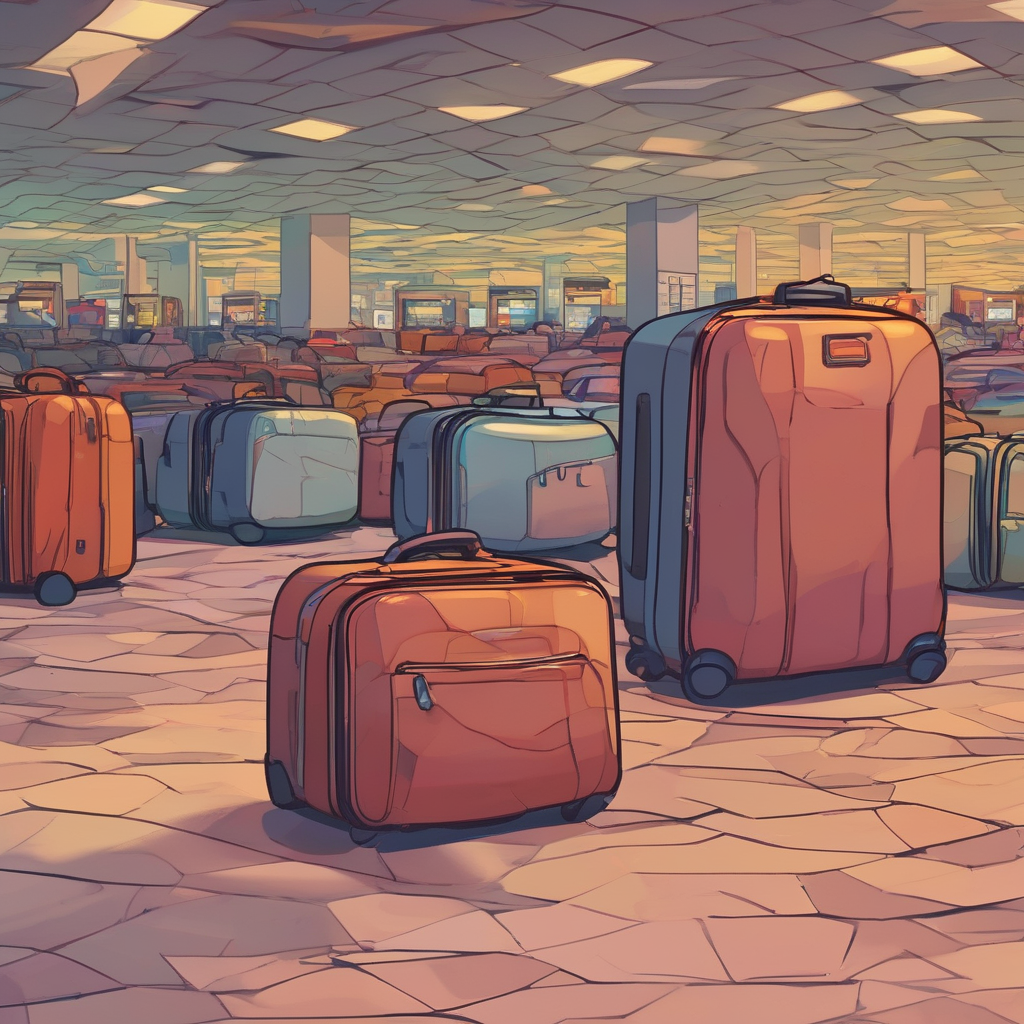

In [128]:
print(dataset[failed_group[98]]["llm_judge"]["llm_distorted_reasoning"])
print(dataset[failed_group[98]]["prompt_distorted"]) 
print(distorted_llm_effects[failed_group[98]])
dataset[failed_group[98]]["image_distorted"]  

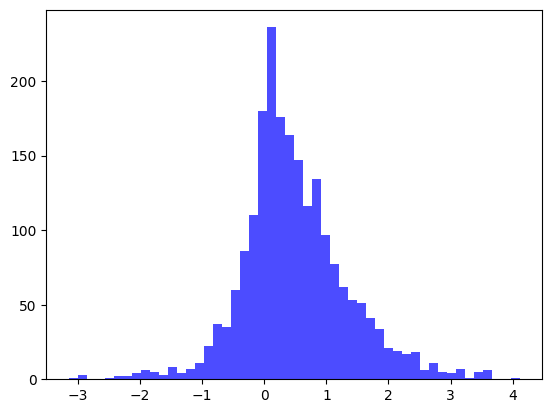

In [56]:
# seems like image reward is related to llm special effects positively
pylab.hist(success_delta_distortion, bins=50, alpha=0.7, color='blue') 
# pylab.hist(failure_delta_distortion, bins=50, alpha=0.7, color='orange')
pylab.show()

In [ ]:
# Wilcoxon signed-rank test
from scipy import stats
statistic, p_value = stats.wilcoxon(success_delta_distortion, alternative='greater')
print(f"Wilcoxon statistic: {statistic}, P-value: {p_value}")

Wilcoxon statistic: 1784906.5, P-value: 7.940988581011471e-137


In [ ]:
import pickle
filename = "hpsv3_rewards.pkl" 
with open(filename, 'rb') as f:
    hpsv3_rewards = pickle.load(f)